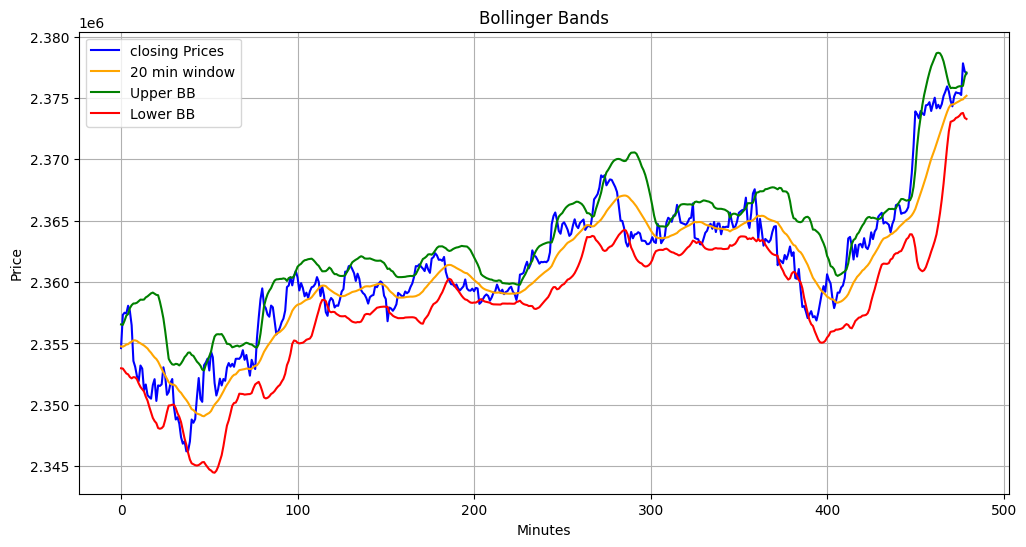

In [9]:
# the data of the stocks of ohlc of last 3 months is present in the file /home/vishi/bolinger/cumul_ohlc.xls
# the data is in the form of DateTime	open	high	low	close	Mean	SD	BB UP Band	BB MID	BB DOWN Band
# datetime is of the form 20241231~09:16:00

import matplotlib.pyplot as plt
import numpy as np
import xlrd


# Read the data from the Excel file
xls_file = '/home/vishi/bolinger/cumul_ohlc.xls'
xls = xlrd.open_workbook(xls_file)
sheet = xls.sheet_by_index(0)
# Extract the data
data = []
for row in range(1, sheet.nrows):
    date = sheet.cell_value(row, 0)
    open_price = sheet.cell_value(row, 1)
    high_price = sheet.cell_value(row, 2)
    low_price = sheet.cell_value(row, 3)
    close_price = sheet.cell_value(row, 4)
    data.append([date, open_price, high_price, low_price, close_price])

closing_prices = [row[4] for row in data]


def get_avg_std(prices, period):
    avg = np.zeros(len(prices))
    std = np.zeros(len(prices))
    for i in range(period, len(prices)):
        avg[i] = np.mean(prices[i-period:i])
        std[i] = np.std(prices[i-period:i])
    return avg, std
period = 20
avg, std = get_avg_std(closing_prices, period)
upper_band = avg + 2 * std
lower_band = avg - 2 * std


closing_prices = closing_prices[period:500]
upper_band = upper_band[period:500]
lower_band = lower_band[period:500]
avg = avg[period:500]
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='closing Prices', color='blue')
plt.plot(avg, label='20 min window', color='orange')
plt.plot(upper_band, label='Upper BB', color='green')
plt.plot(lower_band, label='Lower BB', color='red')

plt.title('Bollinger Bands')
plt.xlabel('Minutes')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()




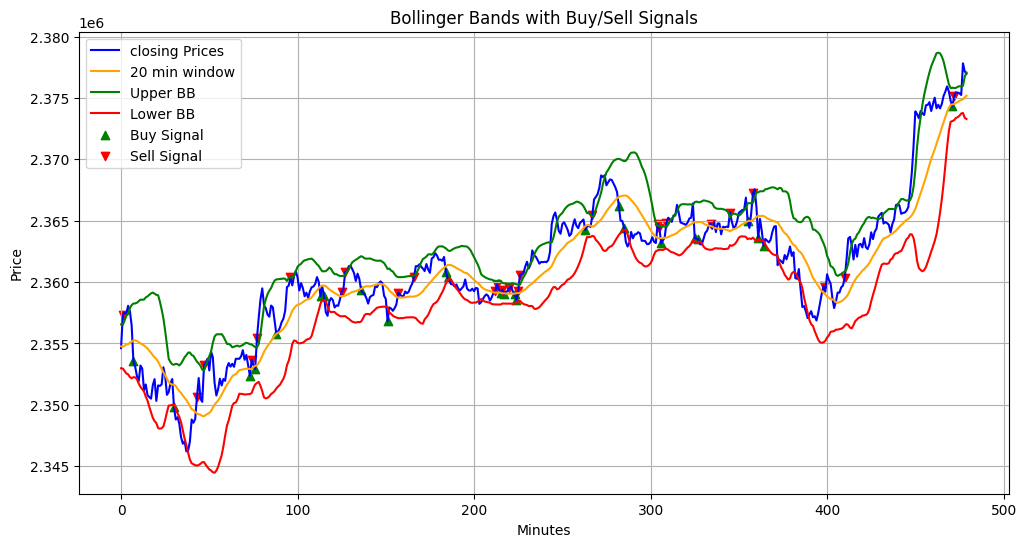

In [10]:
# when the closing price is above the upper band, it is a sell signal
# after this when ever it is below mva square it off
# when the closing price is below the lower band, it is a buy signal
# after this when ever it is above mva square it off

buy_signal = []
sell_signal = []
flag_1 = 0

for i in range(len(closing_prices)):
    if flag_1 == 0:
        if closing_prices[i] < lower_band[i] + 0.5 * std[i]:
            buy_signal.append(i)
            flag_1 = 1
        elif closing_prices[i] > upper_band[i] - 0.5 * std[i]:
            sell_signal.append(i)
            flag_1 = -1
    elif flag_1 == 1:
        if closing_prices[i] > avg[i]:
            sell_signal.append(i)
            flag_1 = 0
    elif flag_1 == -1:
        if closing_prices[i] < avg[i]:
            buy_signal.append(i)
            flag_1 = 0
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='closing Prices', color='blue')
plt.plot(avg, label='20 min window', color='orange')
plt.plot(upper_band, label='Upper BB', color='green')
plt.plot(lower_band, label='Lower BB', color='red')
# Plot buy signals
for i in buy_signal:
    plt.scatter(i, closing_prices[i], marker='^', color='green', label='Buy Signal')
# Plot sell signals
for i in sell_signal:
    plt.scatter(i, closing_prices[i], marker='v', color='red', label='Sell Signal')
plt.title('Bollinger Bands with Buy/Sell Signals')
plt.xlabel('Minutes')
plt.ylabel('Price')
# unique the labels to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid()
plt.show()
    

In [8]:
# flag == 0 doing nothing
# flag == 1 sold and waiting for square off
# flag == -1 buy =========||===============
flag = 0
current_price = 0
profit = 0

for i in range(len(closing_prices)):
    if flag == 0:
        if closing_prices[i] > upper_band[i]:
            flag = 1
            current_price = closing_prices[i]
            print("Sell at", current_price)
            print(i)
        elif closing_prices[i] < lower_band[i]:
            flag = -1
            current_price = closing_prices[i]
            print("Buy at", current_price)
            print(i)
    elif flag == 1:
        if closing_prices[i] < avg[i]:
            flag = 0
            profit += current_price - closing_prices[i]
            print("Square off at", closing_prices[i])
            print("Profit:", profit)
            print(i)
    elif flag == -1:
        if closing_prices[i] > avg[i]:
            flag = 0
            profit += closing_prices[i] - current_price
            print("Square off at", closing_prices[i])
            print("Profit:", profit)
            print(i)
# Print the profit and loss
if flag == 1:
    profit += current_price - closing_prices[-1]
    print("Square off at", closing_prices[-1])
elif flag == -1:
    profit += closing_prices[-1] - current_price
    print("Square off at", closing_prices[-1])

print("Profit:", profit)


Sell at 2357325.0
1
Square off at 2353570.0
Profit: 3755.0
7
Buy at 2349780.0
30
Square off at 2350635.0
Profit: 4610.0
43
Sell at 2353225.0
47
Square off at 2352375.0
Profit: 5460.0
73
Sell at 2355435.0
77
Square off at 2355730.0
Profit: 5165.0
88
Sell at 2360910.0
99
Square off at 2358860.0
Profit: 7215.0
113
Buy at 2357550.0
116
Square off at 2359225.0
Profit: 8890.0
125
Sell at 2360855.0
127
Square off at 2359345.0
Profit: 10400.0
136
Buy at 2356810.0
151
Square off at 2359120.0
Profit: 12710.0
157
Sell at 2361300.0
167
Square off at 2360830.0
Profit: 13180.0
184
Buy at 2360110.0
186
Square off at 2359255.0
Profit: 12325.0
212
Sell at 2360610.0
226
Square off at 2364250.0
Profit: 8685.0
263
Sell at 2365440.0
267
Square off at 2366210.0
Profit: 7915.0
282
Buy at 2363260.0
286
Square off at 2364750.0
Profit: 9405.0
304
Sell at 2364845.0
309
Square off at 2363610.0
Profit: 10640.0
325
Buy at 2363085.0
328
Square off at 2364750.0
Profit: 12305.0
334
Sell at 2365665.0
345
Square off at 